In [37]:
import pandas as pd
import numpy as np
import gc
from sklearn import preprocessing
from IPython.display import clear_output
from utils.age_utils import transform_age, anti_transform_age
from utils.metrics import evaluate_age_prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Data preperation

In [38]:
geo_data_27k = [
    'GSE27317',
    'GSE41037',
    'GSE38873',
    'GSE15745',
    'GSE32393',
    'GSE25892',
    'GSE20242',
    'GSE22595',
    'GSE37988',
    'GSE17448',
    'GSE36642',
    'GSE26126',
    'GSE34035',
    'GSE28746',
    'GSE20236',
    'GSE19711',
    'GSE37008',
    'GSE36812',
    'GSE34257',
    'GSE38608',
    'GSE38291',
    'GSE36166',
    'GSE63384',
    'GSE59274',
    'GSE57285',
    'GSE56606',
    'GSE49908',
    'GSE49907',
    'GSE49905',
    'GSE49904'
]

geo_data_450k = [
    'GSE90124',
    'GSE115797',
    'GSE99624',
    'GSE108213',
    'GSE92767',
    'GSE69176',
    'GSE40360',
    'GSE59157',
    'GSE42861',
    'GSE77241',
    'GSE148000'
]

array_express_27k = [
    'E-GEOD-43256',
    'E-GEOD-64940',
    'E-MTAB-2344',
    'E-GEOD-62867',
    'E-GEOD-44763',
    'E-GEOD-48988',
    'E-GEOD-58119',
    'E-GEOD-58045',
    'E-GEOD-57484',
    'E-GEOD-54211',
    'E-GEOD-56342',
    'E-GEOD-27044',
    'E-GEOD-36194',
    'E-GEOD-21232',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-30758',
    'E-GEOD-32396',
    'E-GEOD-31979',
    'E-MTAB-625',
    'E-MTAB-487'
]

array_express_450k = [
    'E-MTAB-2372',
    'E-GEOD-73832',
    'E-GEOD-71678',
    'E-GEOD-71245',
    'E-GEOD-83334',
    'E-GEOD-75248',
    'E-GEOD-77955',
    'E-GEOD-67705',
    'E-GEOD-77445',
    'E-GEOD-79056',
    'E-GEOD-72556',
    'E-GEOD-52068',
    'E-GEOD-74738',
    'E-GEOD-76105',
    'E-GEOD-65638',
    'E-GEOD-71955',
    'E-GEOD-63106',
    'E-GEOD-73377',
    'E-GEOD-56515',
    'E-GEOD-73103',
    'E-GEOD-67024',
    'E-GEOD-72338',
    'E-GEOD-59457',
    'E-GEOD-64511',
    'E-GEOD-64495',
    'E-GEOD-59509',
    'E-GEOD-67444',
    'E-GEOD-62219',
    'E-GEOD-51954',
    'E-GEOD-52588',
    'E-GEOD-36054',
    'E-GEOD-50660',
    'E-GEOD-61259',
    'E-GEOD-61258',
    'E-GEOD-61257',
    'E-GEOD-61454',
    'E-GEOD-61380',
    'E-GEOD-61107',
    'E-GEOD-54690',
    'E-GEOD-49149',
    'E-GEOD-55438',
    'E-GEOD-53740',
    'E-GEOD-57767',
    'E-GEOD-49064',
    'E-GEOD-50759',
    'E-GEOD-56553',
    'E-GEOD-54399',
    'E-GEOD-53162',
    'E-GEOD-53128',
    'E-GEOD-50498',
    'E-GEOD-47513',
    'E-GEOD-49393',
    'E-GEOD-39004',
    'E-GEOD-51388',
    'E-GEOD-51032',
    'E-GEOD-48325',
    'E-GEOD-44712',
    'E-GEOD-45461',
    'E-GEOD-40279',
    'E-GEOD-41169',
    'E-GEOD-32149',
    'E-GEOD-41826',
    'E-GEOD-42700',
    'E-GEOD-32146',
    'E-GEOD-30870',
    'E-GEOD-34639',
    'E-GEOD-63347',
    'E-GEOD-59592'
]

tcga_all = [
    'TGCA_LUSC',
    'TGCA_THCA',
    'TGCA_HNSC',
    'TGCA_KIRC',
    'TGCA_KIRP',
    'TGCA_LUAD',
    'TGCA_PRAD',
    'TGCA_STAD',
    'TGCA_COAD',
    'TGCA_LIHC',
    'TGCA_UCEC',
    'TGCA_BRCA'
]

cancer_data = [
    'GSE32393',
    'GSE37988',
    'GSE26126',
    'GSE63384',
    'GSE59157',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-31979',
    'E-GEOD-77955',
    'E-GEOD-52068',
    'E-GEOD-49149',
    'E-GEOD-39004'
]

cancer_comparison = [
    'GSE53051',
]

reliability = [
    'GSE55763',
]

rejuvenation = [
    'GSE142439',
    'GSE116754',
    'GSE65214',
    'GSE44430',
    'GSE45727',
    'GSE30653',
    'GSE37066',
    'GSE30456',
]

senescence_analysis = [
    'GSE91069',
    'GSE100249'
]

data_27k = np.concatenate([np.array(geo_data_27k), np.array(array_express_27k)])
data_450k = np.concatenate([np.array(geo_data_450k), np.array(array_express_450k)])
geo_data = np.concatenate([data_27k, data_450k])
tcga_all = np.array(tcga_all)
all_data = np.concatenate([data_27k, data_450k, tcga_all])

In [39]:
#load all train data for model training
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_train = pd.read_pickle('../data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('../data_train/' + dataset + '.pkl')
        all_train = pd.concat([all_train, new_df], join ='inner')
        gc.collect()
    clear_output()

#load all test data
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_test = pd.read_pickle('../data_test/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('../data_test/' + dataset + '.pkl')
        all_test = pd.concat([all_test, new_df], join ='inner')
        gc.collect()
    clear_output()

In [40]:
multi_platform_cpgs = np.array(pd.read_pickle('../dependencies/multi_platform_cpgs.pkl'))

#extracting age and removing unimportant columns
train_ages = all_train['age'].astype('float64')
test_ages = all_test['age'].astype('float64')

train_info = all_train[['dataset', 'tissue_type', 'age', 'gender']]
test_info = all_test[['dataset', 'tissue_type', 'age', 'gender']]

train = all_train[multi_platform_cpgs]
test = all_test[multi_platform_cpgs]

In [41]:
train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

In [42]:
#scaling the data so each columns has 0 mean and variance 1
scaler = preprocessing.RobustScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), index = train_index, columns = train_cols)
test_scaled = pd.DataFrame(scaler.transform(test), index = test_index, columns = test_cols)

## Prepare Horvath's CpG data

In [43]:
# Load the CSV file
coeff_df = pd.read_csv("../dependencies/horvath_cpg.csv", skiprows=2)  # skip rows for metadata above the header

# Get the list of CpG IDs (excluding the intercept row)
horvath_cpg_list = coeff_df['CpGmarker'].dropna().tolist()
horvath_cpg_list = [cpg for cpg in horvath_cpg_list if cpg != '(Intercept)']

In [44]:
train_horvath = all_train[horvath_cpg_list]
test_horvath = all_test[horvath_cpg_list]

train_cols_horvath = train_horvath.columns
train_index_horvath = train_horvath.index

test_cols_horvath = test_horvath.columns
test_index_horvath = test_horvath.index

In [45]:
scaler_horvath = preprocessing.RobustScaler()

train_horvath_scaled = pd.DataFrame(scaler_horvath.fit_transform(train_horvath), index = train_index_horvath, columns = train_cols_horvath)
test_horvath_scaled = pd.DataFrame(scaler_horvath.transform(test_horvath), index = test_index_horvath, columns = test_cols_horvath)

# Models

# Decision Trees

In [65]:
tree_model_horvath = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model_horvath.fit(train_horvath, transform_age(train_ages))

DecisionTreeRegressor(max_depth=5, random_state=42)

In [90]:
result_horvath = anti_transform_age(tree_model_horvath.predict(test_horvath))

res_horvath = evaluate_age_prediction(test_ages, result_horvath, model_name="Decision tree", cpg_count=np.sum(tree_model_horvath.feature_importances_ > 0))
print(res_horvath.round(3))

           Model  CpGs    MAD    MAE      MSE  Pearson R  Median Error
0  Decision tree    27  6.841  9.659  193.911      0.861        -0.012


In [51]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(train, transform_age(train_ages))

DecisionTreeRegressor(max_depth=5, random_state=42)

In [91]:
result_tree = anti_transform_age(tree_model.predict(test))

res_tree = evaluate_age_prediction(test_ages, result_tree, model_name="Decision tree", cpg_count=np.sum(tree_model_horvath.feature_importances_ > 0))
print(res_tree.round(3))

           Model  CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  Decision tree    27  6.876  9.65  192.42      0.861        -0.013


## Random Forest

In [68]:
forest_model_horvath = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model_horvath.fit(train_horvath, transform_age(train_ages))

RandomForestRegressor(max_depth=5, random_state=42)

In [69]:
result_forest_horvath = anti_transform_age(forest_model_horvath.predict(test_horvath))

res_forest_horvath = evaluate_age_prediction(test_ages, result_forest_horvath, model_name="Random forest", cpg_count=np.sum(forest_model_horvath.feature_importances_ > 0))
print(res_forest_horvath.round(3))

           Model  CpGs    MAD    MAE      MSE  Pearson R  Median Error
0  Random forest   323  5.553  8.085  137.182      0.905         0.007


In [54]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(train, transform_age(train_ages))

RandomForestRegressor(max_depth=5, random_state=42)

In [70]:
result_forest = anti_transform_age(forest_model.predict(test))

res_forest = evaluate_age_prediction(test_ages, result_forest, model_name="Random forest", cpg_count=np.sum(forest_model.feature_importances_ > 0))
print(res_forest.round(3))

           Model  CpGs    MAD    MAE      MSE  Pearson R  Median Error
0  Random forest  1386  5.858  8.183  136.386      0.906         0.004


## XGBoost

## XGBoost, horvath's CpG

In [73]:
dtrain = xgb.DMatrix(data=train_horvath, label=transform_age(train_ages))

params = {
    'tree_method': 'hist',
    'device' : 'cuda',
    'predictor':'gpu_predictor',
    'max_depth': 4,
    'learning_rate': 0.1,
}

xgboost_horvath = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100
)


C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:36:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [74]:
dtest = xgb.DMatrix(test_horvath)

result_xgboost_horvath = anti_transform_age(xgboost_horvath.predict(dtest))

res = evaluate_age_prediction(test_ages, result_xgboost_horvath, model_name="XGBoost", cpg_count=len(xgboost_horvath.get_score(importance_type='weight')))
print(res.round(3))

     Model  CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  XGBoost   297  3.443  5.09  57.252      0.961         0.022


In [75]:
dtrain = xgb.DMatrix(data=train_horvath, label=transform_age(train_ages))
xgboostcv_horvath = xgb.XGBRegressor(
    tree_method='hist',
    device = 'cuda',
    predictor='gpu_predictor'
)

param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [300, 500]
}

grid_search = GridSearchCV(xgboostcv_horvath, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train_horvath, transform_age(train_ages))

print(grid_search.best_params_)

KeyboardInterrupt: 

In [29]:
best_model = grid_search.best_estimator_
result = anti_transform_age(best_model.predict(test_horvath))

res = evaluate_age_prediction(test_ages, result, model_name="XGBoost", cpg_count=len(train_cols_horvath))
print(res.round(3))

     Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  XGBoost   353  2.918  4.493  48.055      0.967         0.003


In [78]:
xgboost_best_param = xgb.XGBRegressor(
    tree_method='hist',
    device = 'cuda',
    predictor='gpu_predictor',
    n_estimators=500,
    max_depth=7,
    learning_rate=0.1
)

xgboost_best_param.fit(train_horvath, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [81]:
result_best_param = anti_transform_age(xgboost_best_param.predict(test_horvath))

res_best_param = evaluate_age_prediction(test_ages, result_best_param, model_name="XGBoost", cpg_count=len(xgboost_best_param.get_booster().get_score(importance_type='weight')))
print(res_best_param.round(3))

     Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  XGBoost   353  2.918  4.493  48.055      0.967         0.003


## XGBoost, all CpG's

In [35]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=train, label=transform_age(train_ages))

params = {
    'tree_method': 'hist',
    'device' : 'cuda',
    'predictor':'gpu_predictor',
    'max_depth': 5,
    'learning_rate': 0.1,
}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100
)


C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:32:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [36]:
dtest = xgb.DMatrix(test)

result = anti_transform_age(model.predict(dtest))

res = evaluate_age_prediction(test_ages, result, model_name="XGBoost", cpg_count=len(train_cols_horvath))
print(res.round(3))

     Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  XGBoost   353  3.303  4.795  51.851      0.965         0.005


In [42]:
model = xgb.XGBRegressor(
    tree_method='hist',
    device = 'cuda',
    predictor='gpu_predictor',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1
)

model.fit(train, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:13:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
result = anti_transform_age(model.predict(test))

res = evaluate_age_prediction(test_ages, result, model_name="XGBoost", cpg_count=len(train_cols_horvath))
print(res.round(3))

     Model  CpGs    MAD    MAE    MSE  Pearson R  Median Error
0  XGBoost   353  3.446  4.994  54.95      0.963         0.024


In [34]:
model = xgb.XGBRegressor(
    tree_method='hist',
    device = 'cuda',
    predictor='gpu_predictor'
)

param_grid = {
    'max_depth': [5],
    'learning_rate': [0.1],
    'n_estimators': [100]
}

grid_search_all = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_all.fit(train, transform_age(train_ages))

print(grid_search.best_params_)

KeyboardInterrupt: 

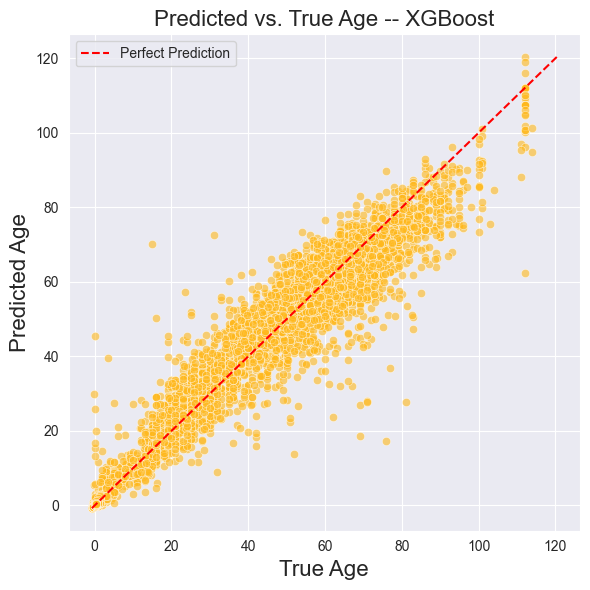

In [93]:
import importlib
from utils import visualization

importlib.reload(visualization)
from utils.visualization import plot_predicted_vs_true

plot_predicted_vs_true(test_ages, result_best_param, (255/255, 184/255, 28/255), "XGBoost")

In [92]:
# Step 1: Evaluate each model
results = []

results.append(res_horvath)
results.append(res_forest)
results.append(res_best_param)

# Step 2: Combine into one DataFrame
all_results = pd.concat(results, ignore_index=True)

# Step 3: Bold best scores
def bold_best(s, maximize=False):
    if maximize:
        is_best = s == s.max()
    else:
        is_best = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_best]

styled_table = (
    all_results.style
    .apply(bold_best, subset=['MAD'], maximize=False)
    .apply(bold_best, subset=['MAE'], maximize=False)
    .apply(bold_best, subset=['MSE'], maximize=False)
    .apply(bold_best, subset=['Pearson R'], maximize=True)
    .apply(bold_best, subset=['Median Error'], maximize=False)
)

styled_table


,Model,CpGs,MAD,MAE,MSE,Pearson R,Median Error
0,Decision tree,27,6.840813,9.658944,193.910971,0.860795,-0.012218
1,Random forest,1386,5.858308,8.183331,136.385890,0.905748,0.003716
2,XGBoost,353,2.918369,4.492687,48.054718,0.967443,0.003221
